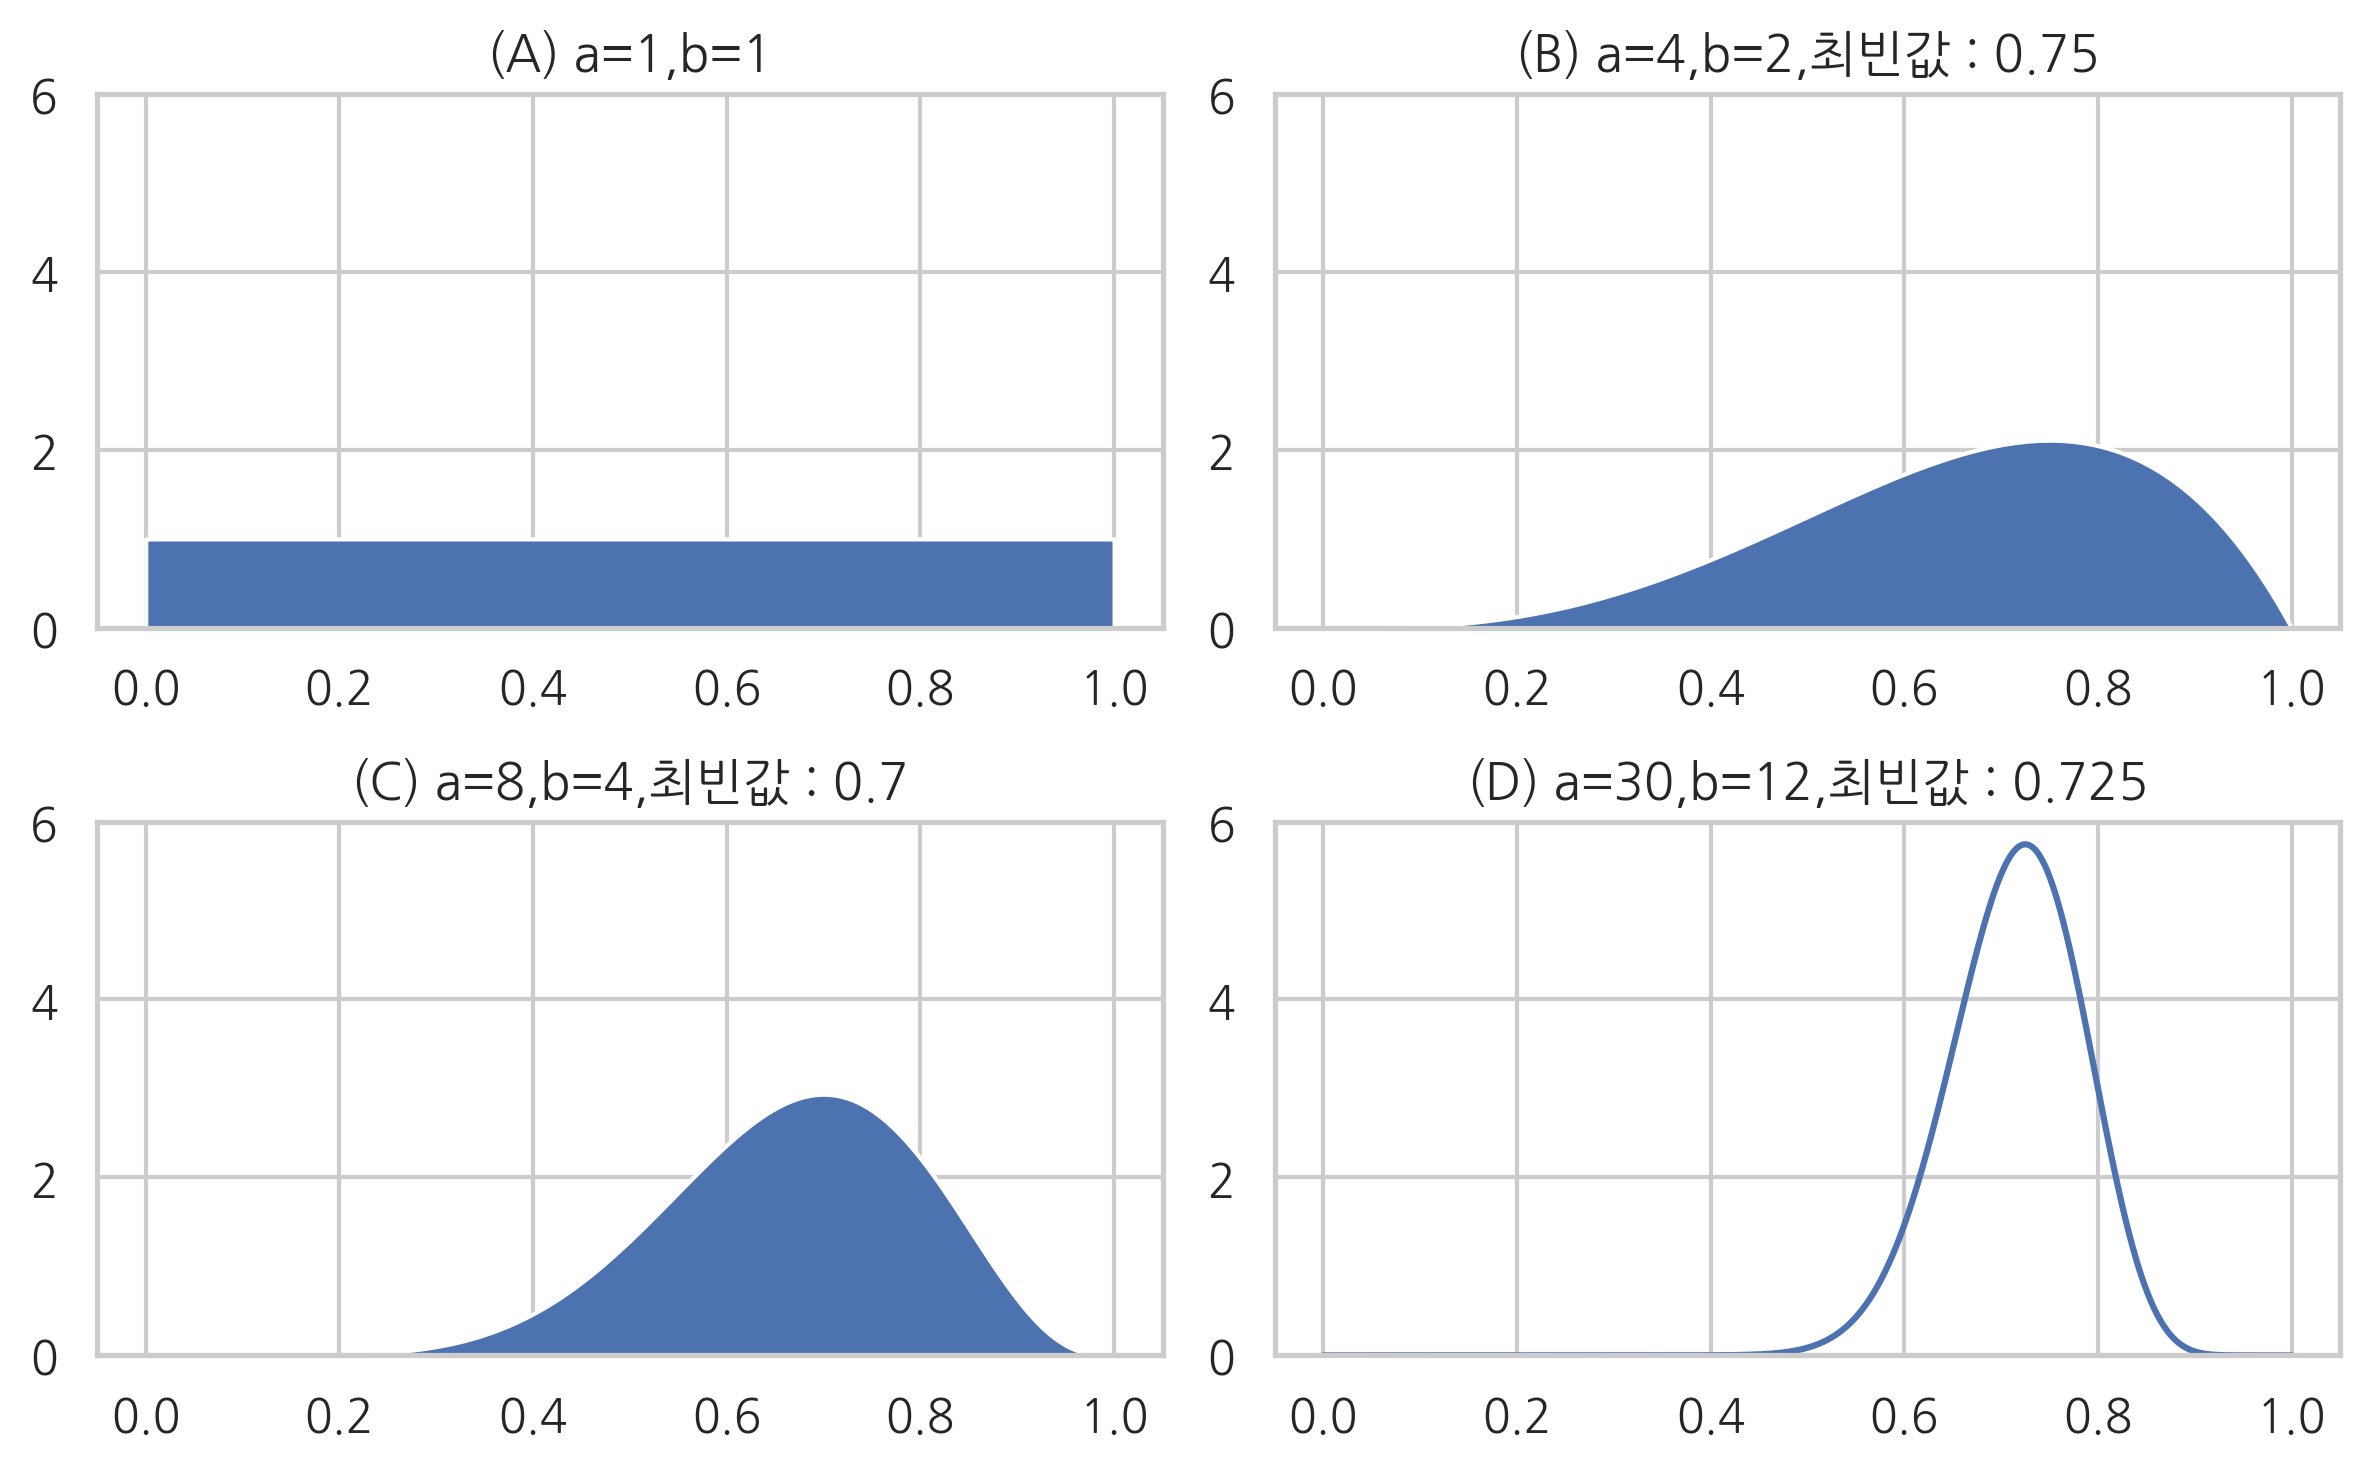

In [38]:
from scipy.stats import mode #최빈값 함수

xx = np.linspace(0,1,1000)
plt.subplot(221)
plt.fill_between(xx, sp.stats.beta(1,1).pdf(xx))
plt.ylim(0,6)
plt.title('(A) a=1,b=1')

plt.subplot(222)
plt.fill_between(xx, sp.stats.beta(4,2).pdf(xx))
plt.ylim(0,6)
plt.title('(B) a=4,b=2,최빈값 : {}'.format((4-1)/(4+2-2)))

plt.subplot(223)
plt.fill_between(xx, sp.stats.beta(8,4).pdf(xx))
plt.ylim(0,6)
plt.title('(C) a=8,b=4,최빈값 : {}'.format((8-1)/(8+4-2)))

plt.subplot(224)
plt.plot(xx, sp.stats.beta(30,12).pdf(xx))
plt.ylim(0,6)
plt.title('(D) a=30,b=12,최빈값 : {}'.format((30-1)/(30+12-2)))

plt.tight_layout()
plt.show()

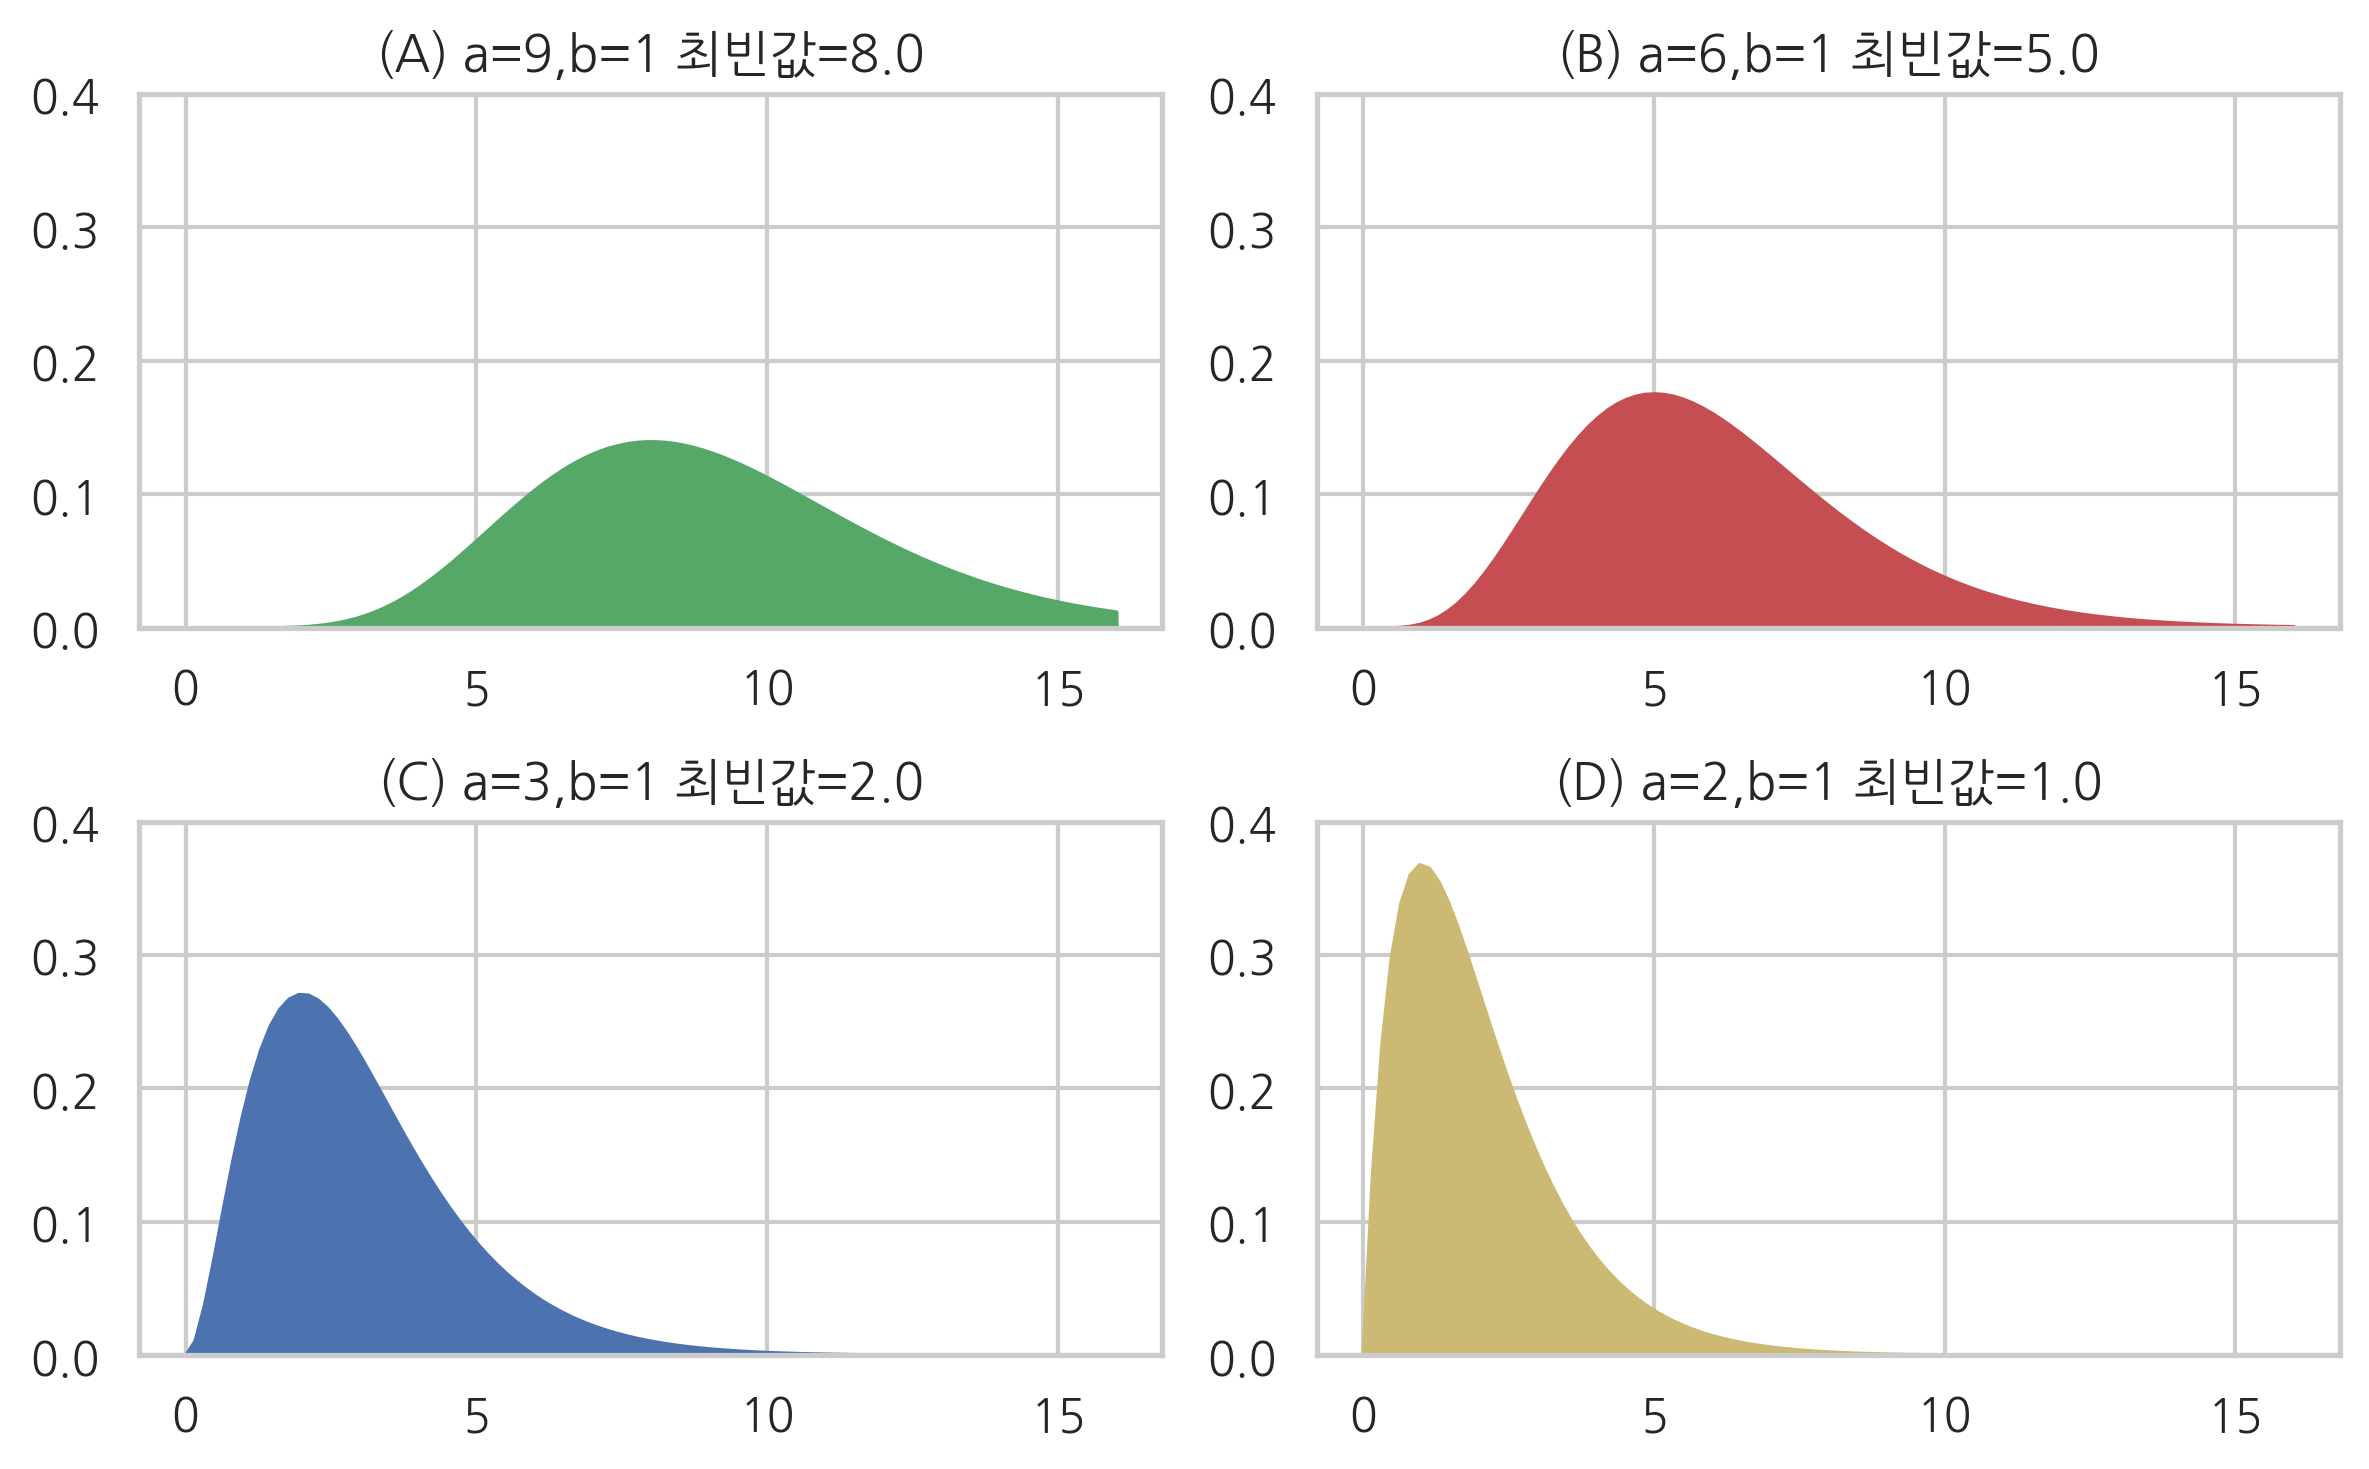

In [57]:
xx = np.linspace(0,16,100)
plt.subplot(221)
plt.fill_between(xx, sp.stats.gamma(a=9).pdf(xx),color='g')
plt.ylim(0,0.4)
plt.title('(A) a=9,b=1 최빈값={}'.format((9-1)/1))

plt.subplot(222)
plt.fill_between(xx, sp.stats.gamma(a=6).pdf(xx),color='r')
plt.ylim(0,0.4)
plt.title('(B) a=6,b=1 최빈값={}'.format((6-1)/1))

plt.subplot(223)
plt.fill_between(xx, sp.stats.gamma(a=3).pdf(xx),color='b')
plt.ylim(0,0.4)
plt.title('(C) a=3,b=1 최빈값={}'.format((3-1)/1))

plt.subplot(224)
plt.fill_between(xx, sp.stats.gamma(a=2).pdf(xx),color='y')
plt.ylim(0,0.4)
plt.title('(D) a=2,b=1 최빈값={}'.format((2-1)/1))
plt.tight_layout()
plt.show()

# 6월 20일
디리클레분포 실습

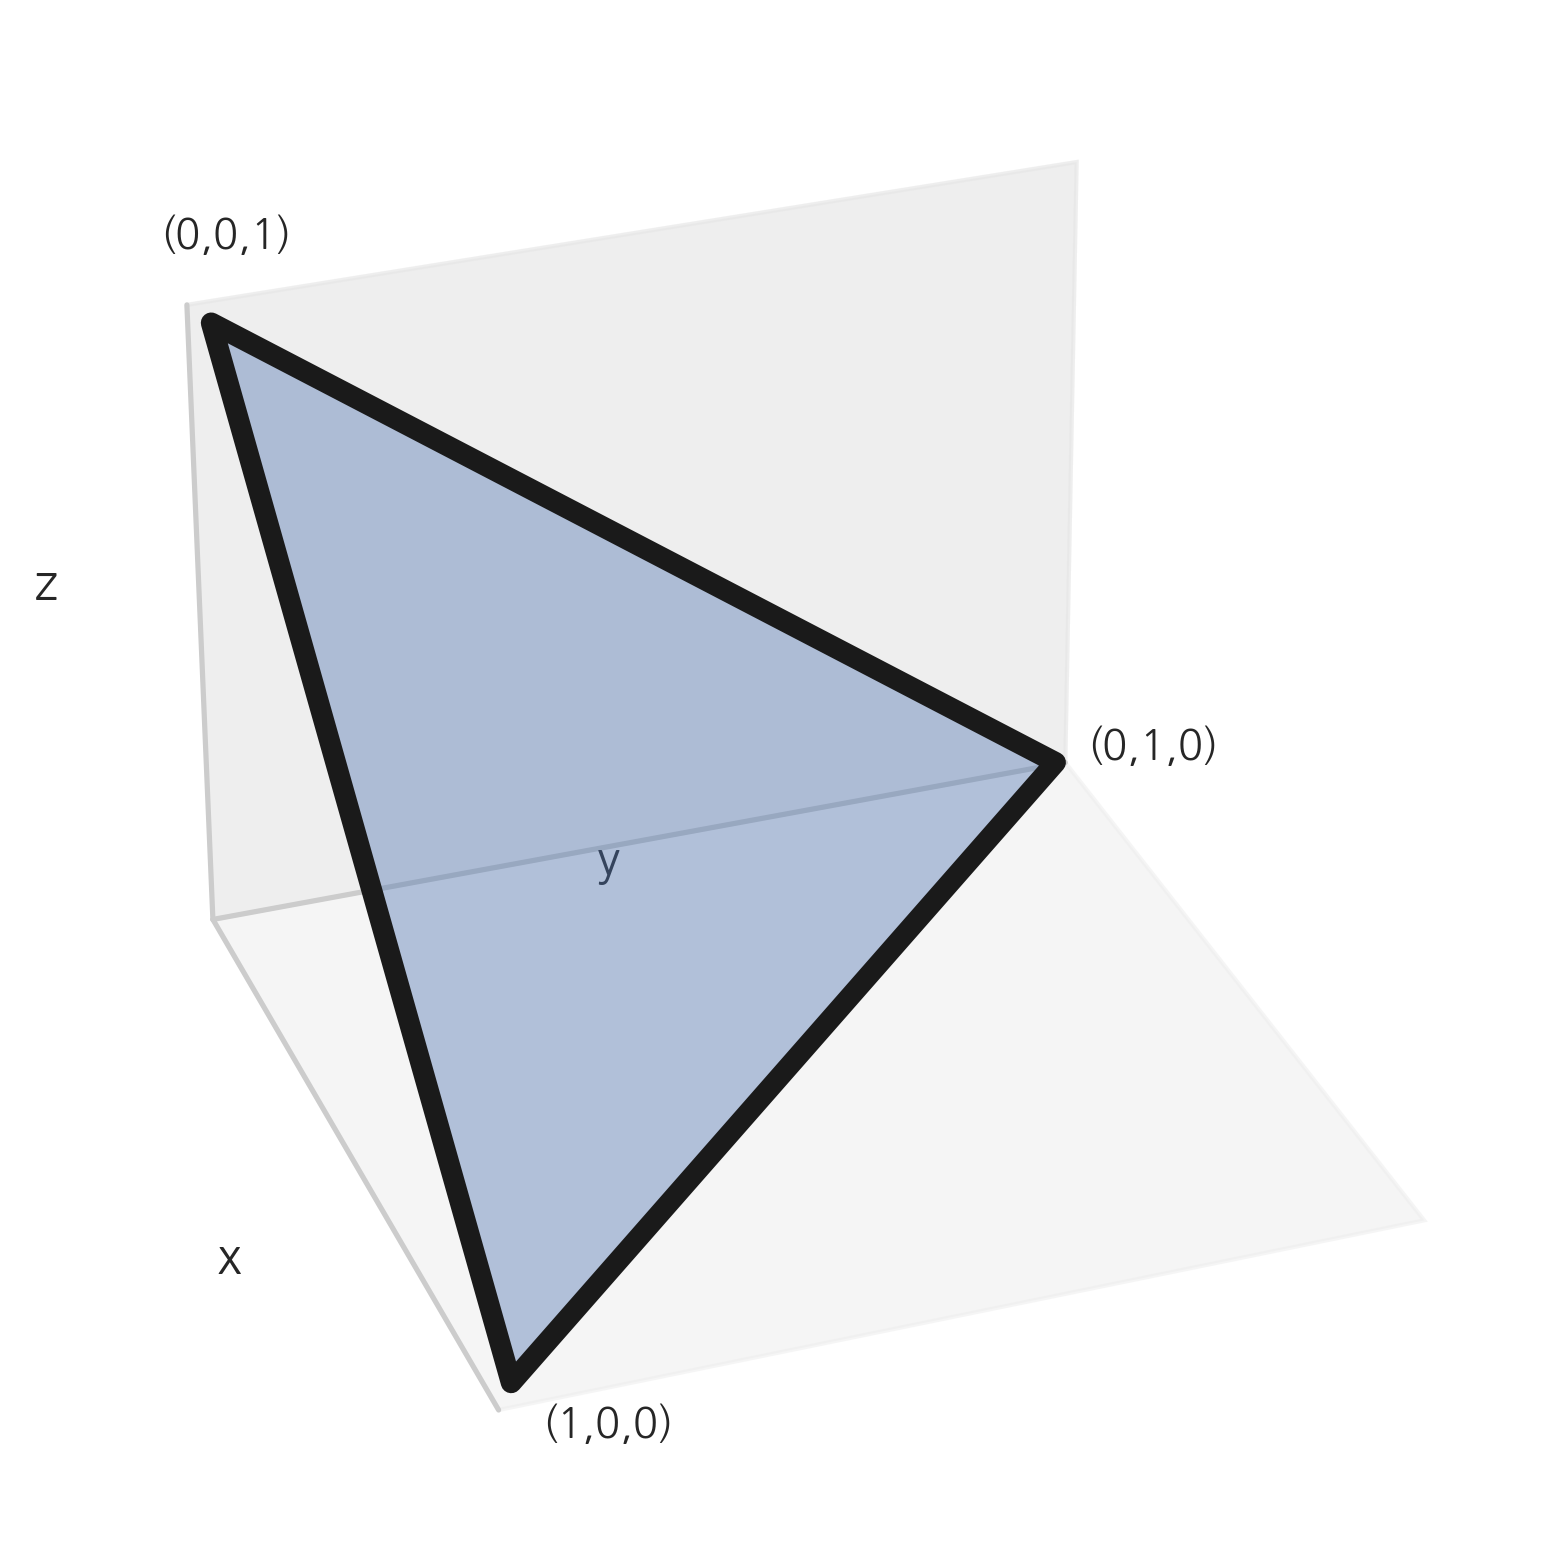

In [100]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure()
ax = Axes3D(fig)

x = [1,0,0]
y = [0,1,0]
z = [0,0,1]
verts = list(zip(x,y,z)) # 삼각형 각 꼭짓점 생성
ax.add_collection3d(Poly3DCollection(verts, edgecolor='k', lw=5, alpha=0.4))
ax.text(1,0,0,'(1,0,0)',position=(1.1,0))
ax.text(0,1,0,'(0,1,0)',position=(0,1.04))
ax.text(0,0,1,'(0,0,1)',position=(-0.2,0))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.view_init(30,-20)
tmp_planes = ax.zaxis._PLANES


ax.yaxis._PLANES = (
    tmp_planes[2], tmp_planes[3],
    tmp_planes[0], tmp_planes[1],
    tmp_planes[4], tmp_planes[5],
)
ax.zaxis._PLANES = (
    tmp_planes[2], tmp_planes[3],
    tmp_planes[0], tmp_planes[1],
    tmp_planes[4], tmp_planes[5],
)


In [101]:
def plot_triangle(X, kind) : 
    n1 = np.array([1,0,0])
    n2 = np.array([0,1,0])
    n3 = np.array([0,0,1])
    n12 = (n1+n2)/2
    m1 = np.array([1,-1,0])
    m2 = n3-n12
    m1 = m1/np.linalg.norm(m1)
    m2 = m2/np.linalg.norm(m2)
    
    X1 = (X-n12)@m1
    X2 = (X-n12)@m2
    
    sns.jointplot(X1,X2,kind=kind, xlim=(-0.8,0.8),ylim=(-0.1,1.25))
    plt.show()

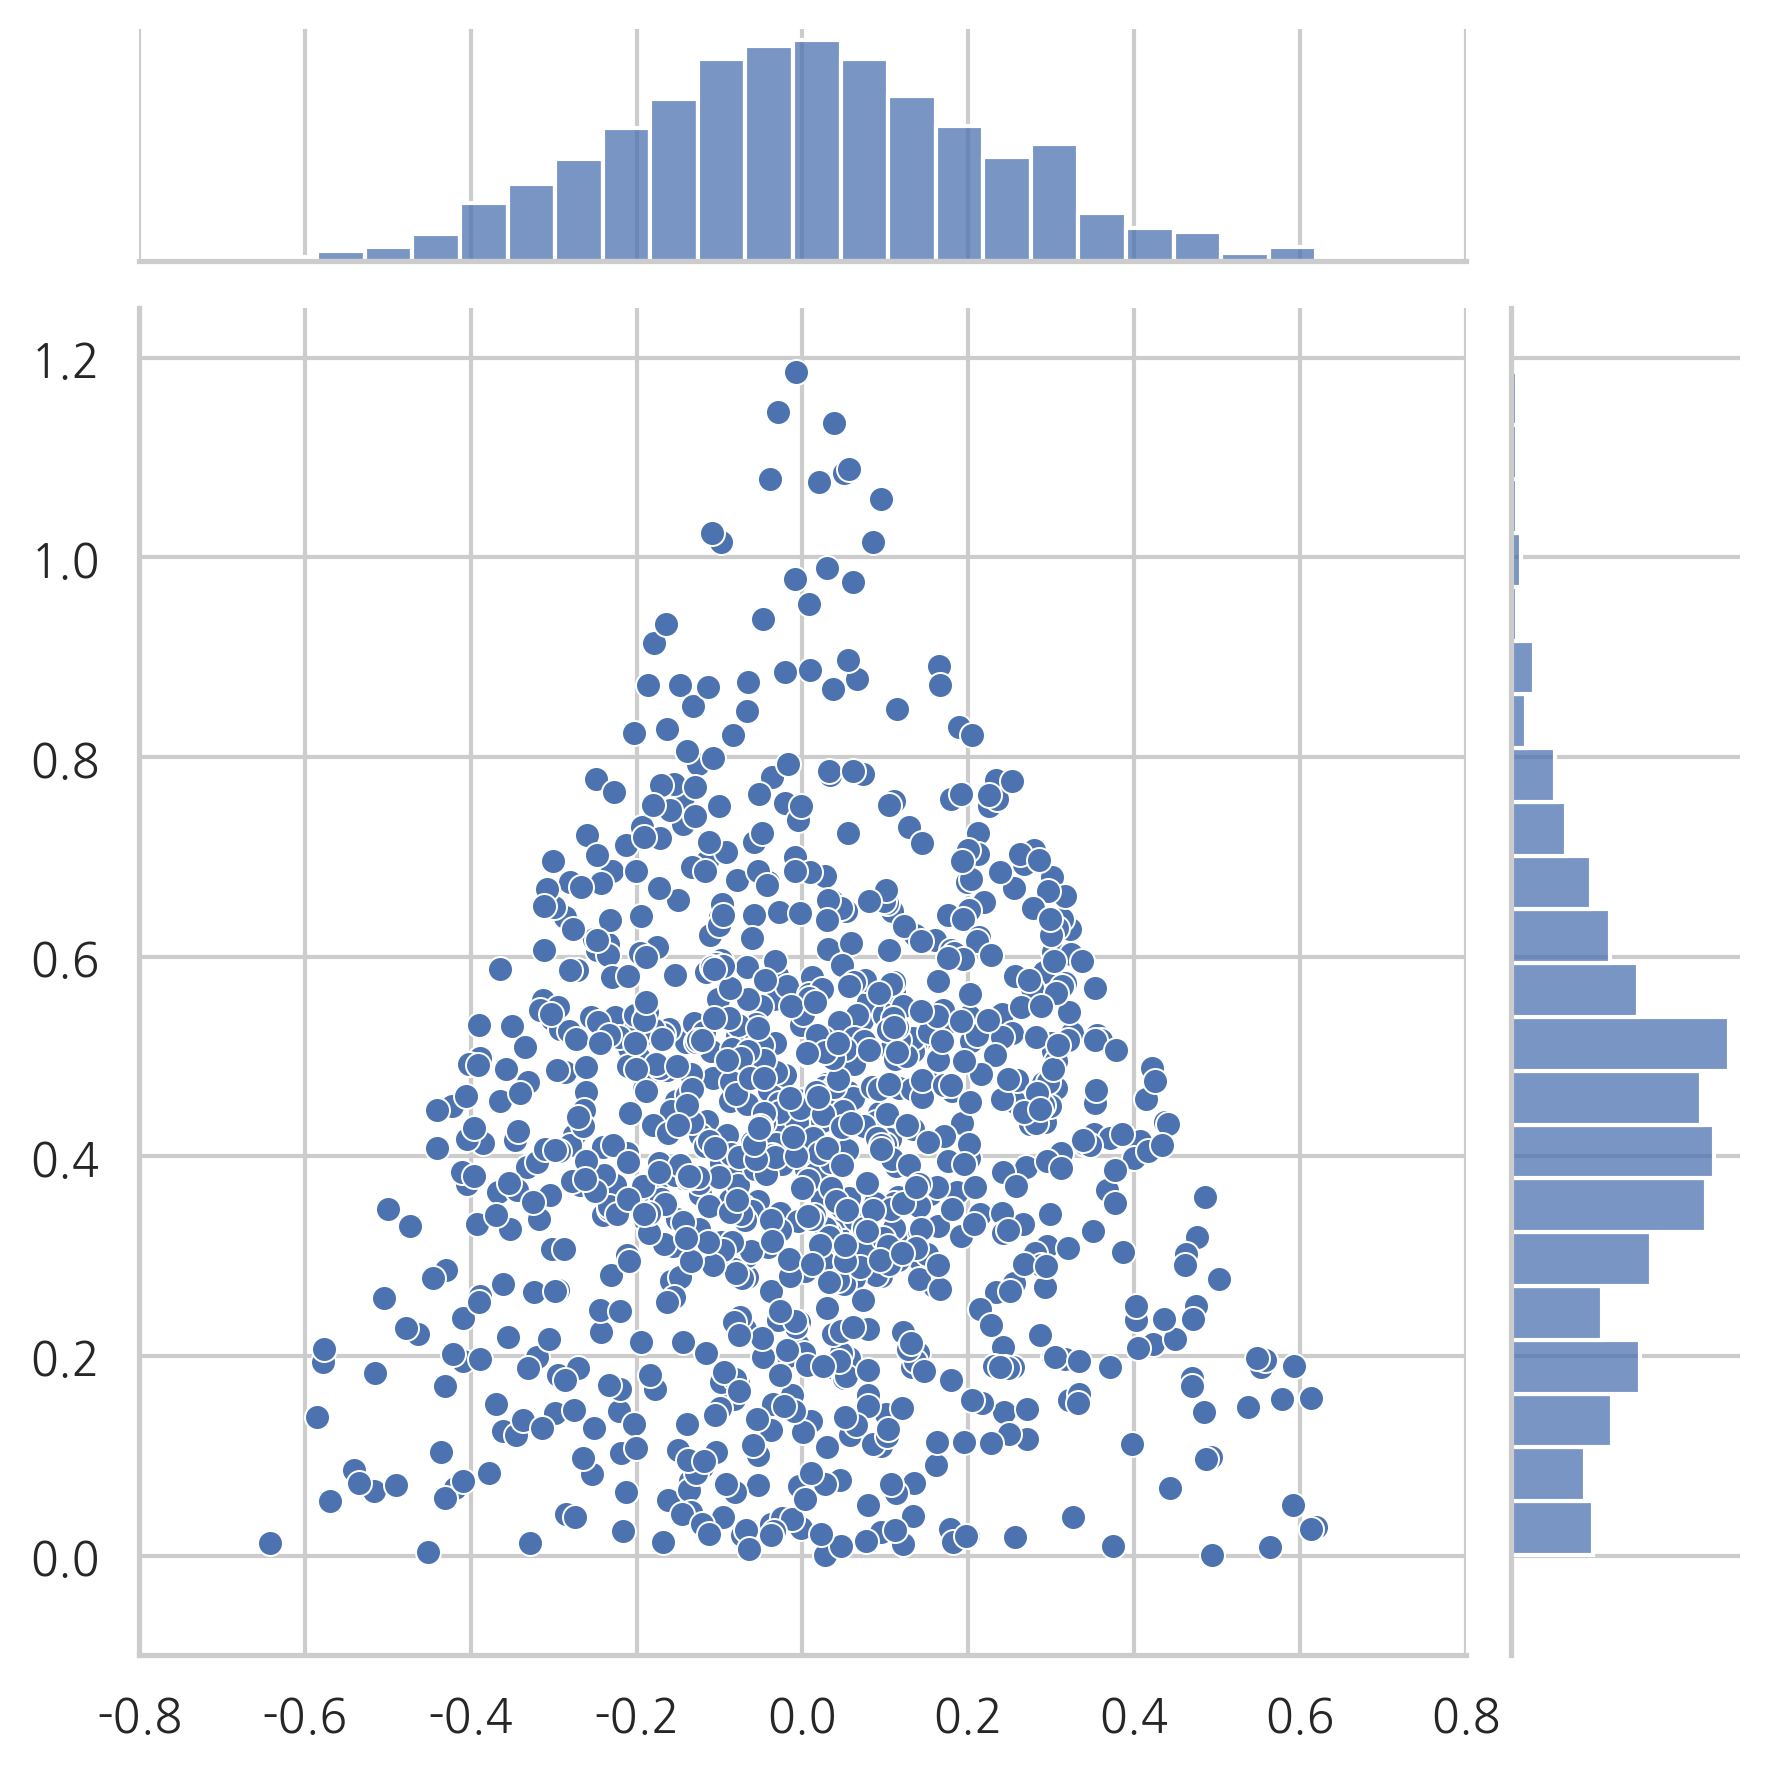

In [126]:
np.random.seed(0)
X1 = np.random.rand(1000,3) #균등분포 [0,1]구간에서 표본 추출
X1 = X1/X1.sum(axis=1)[:,np.newaxis]
plot_triangle(X1,kind='scatter')

# 불균등하게 분포된 데이터들
- 중간에 데이터 분포가 집중되어 있다.

# 육각히스토그램으로 위 데이터 분포 시각화하기 

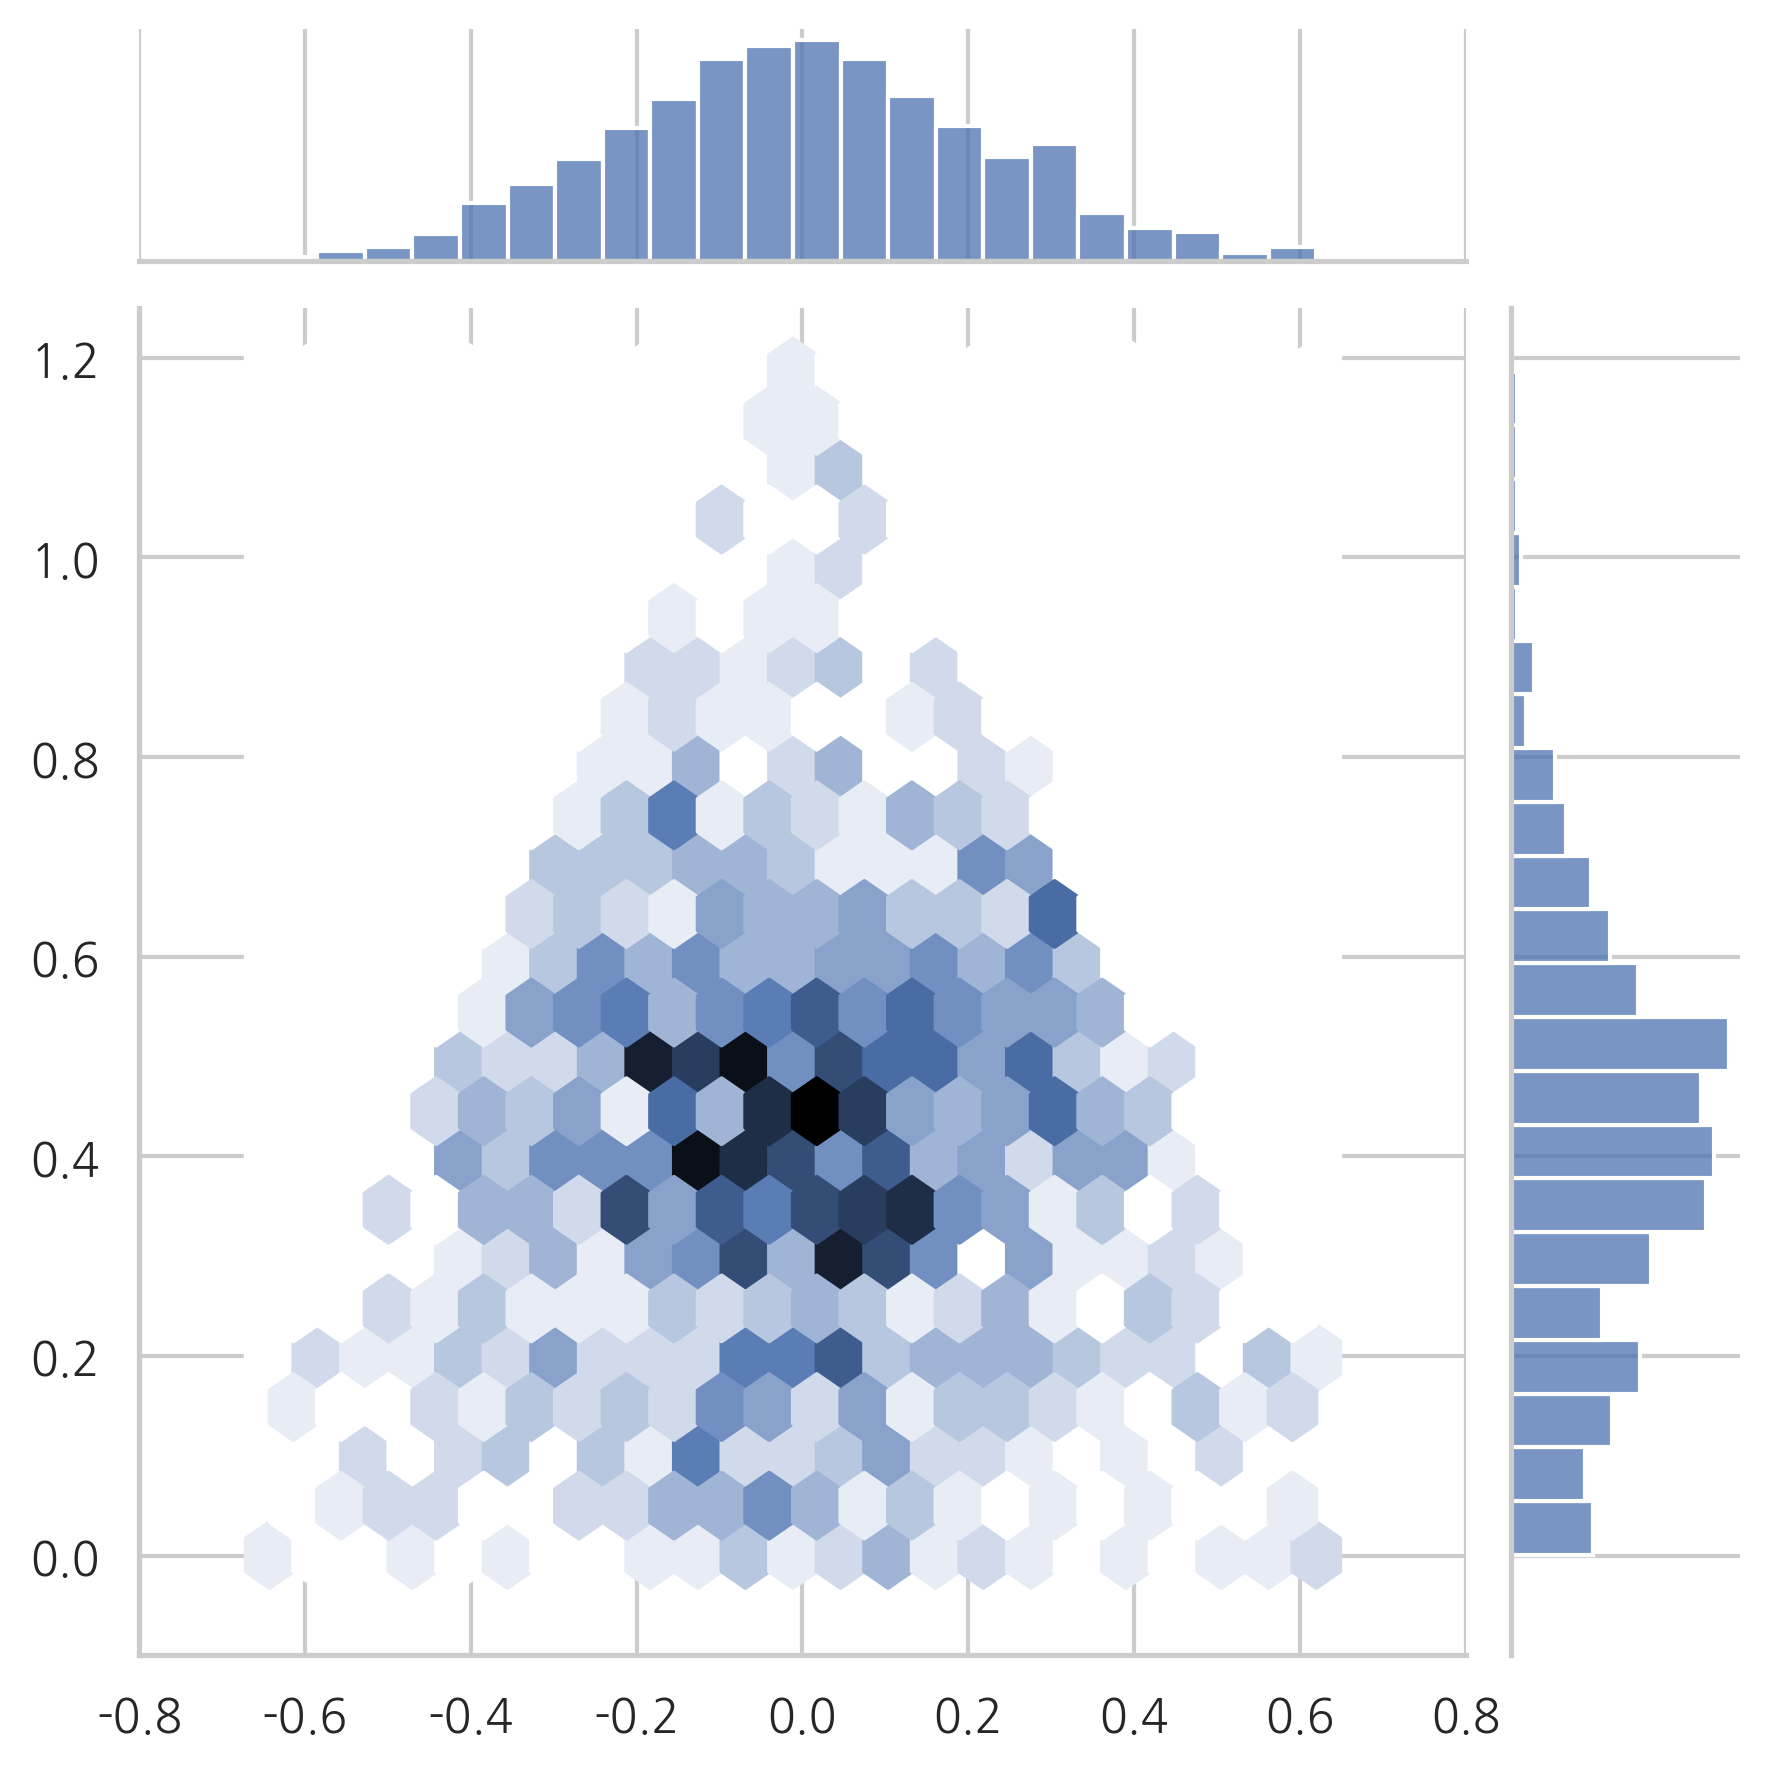

In [127]:
plot_triangle(X1,kind='hex')

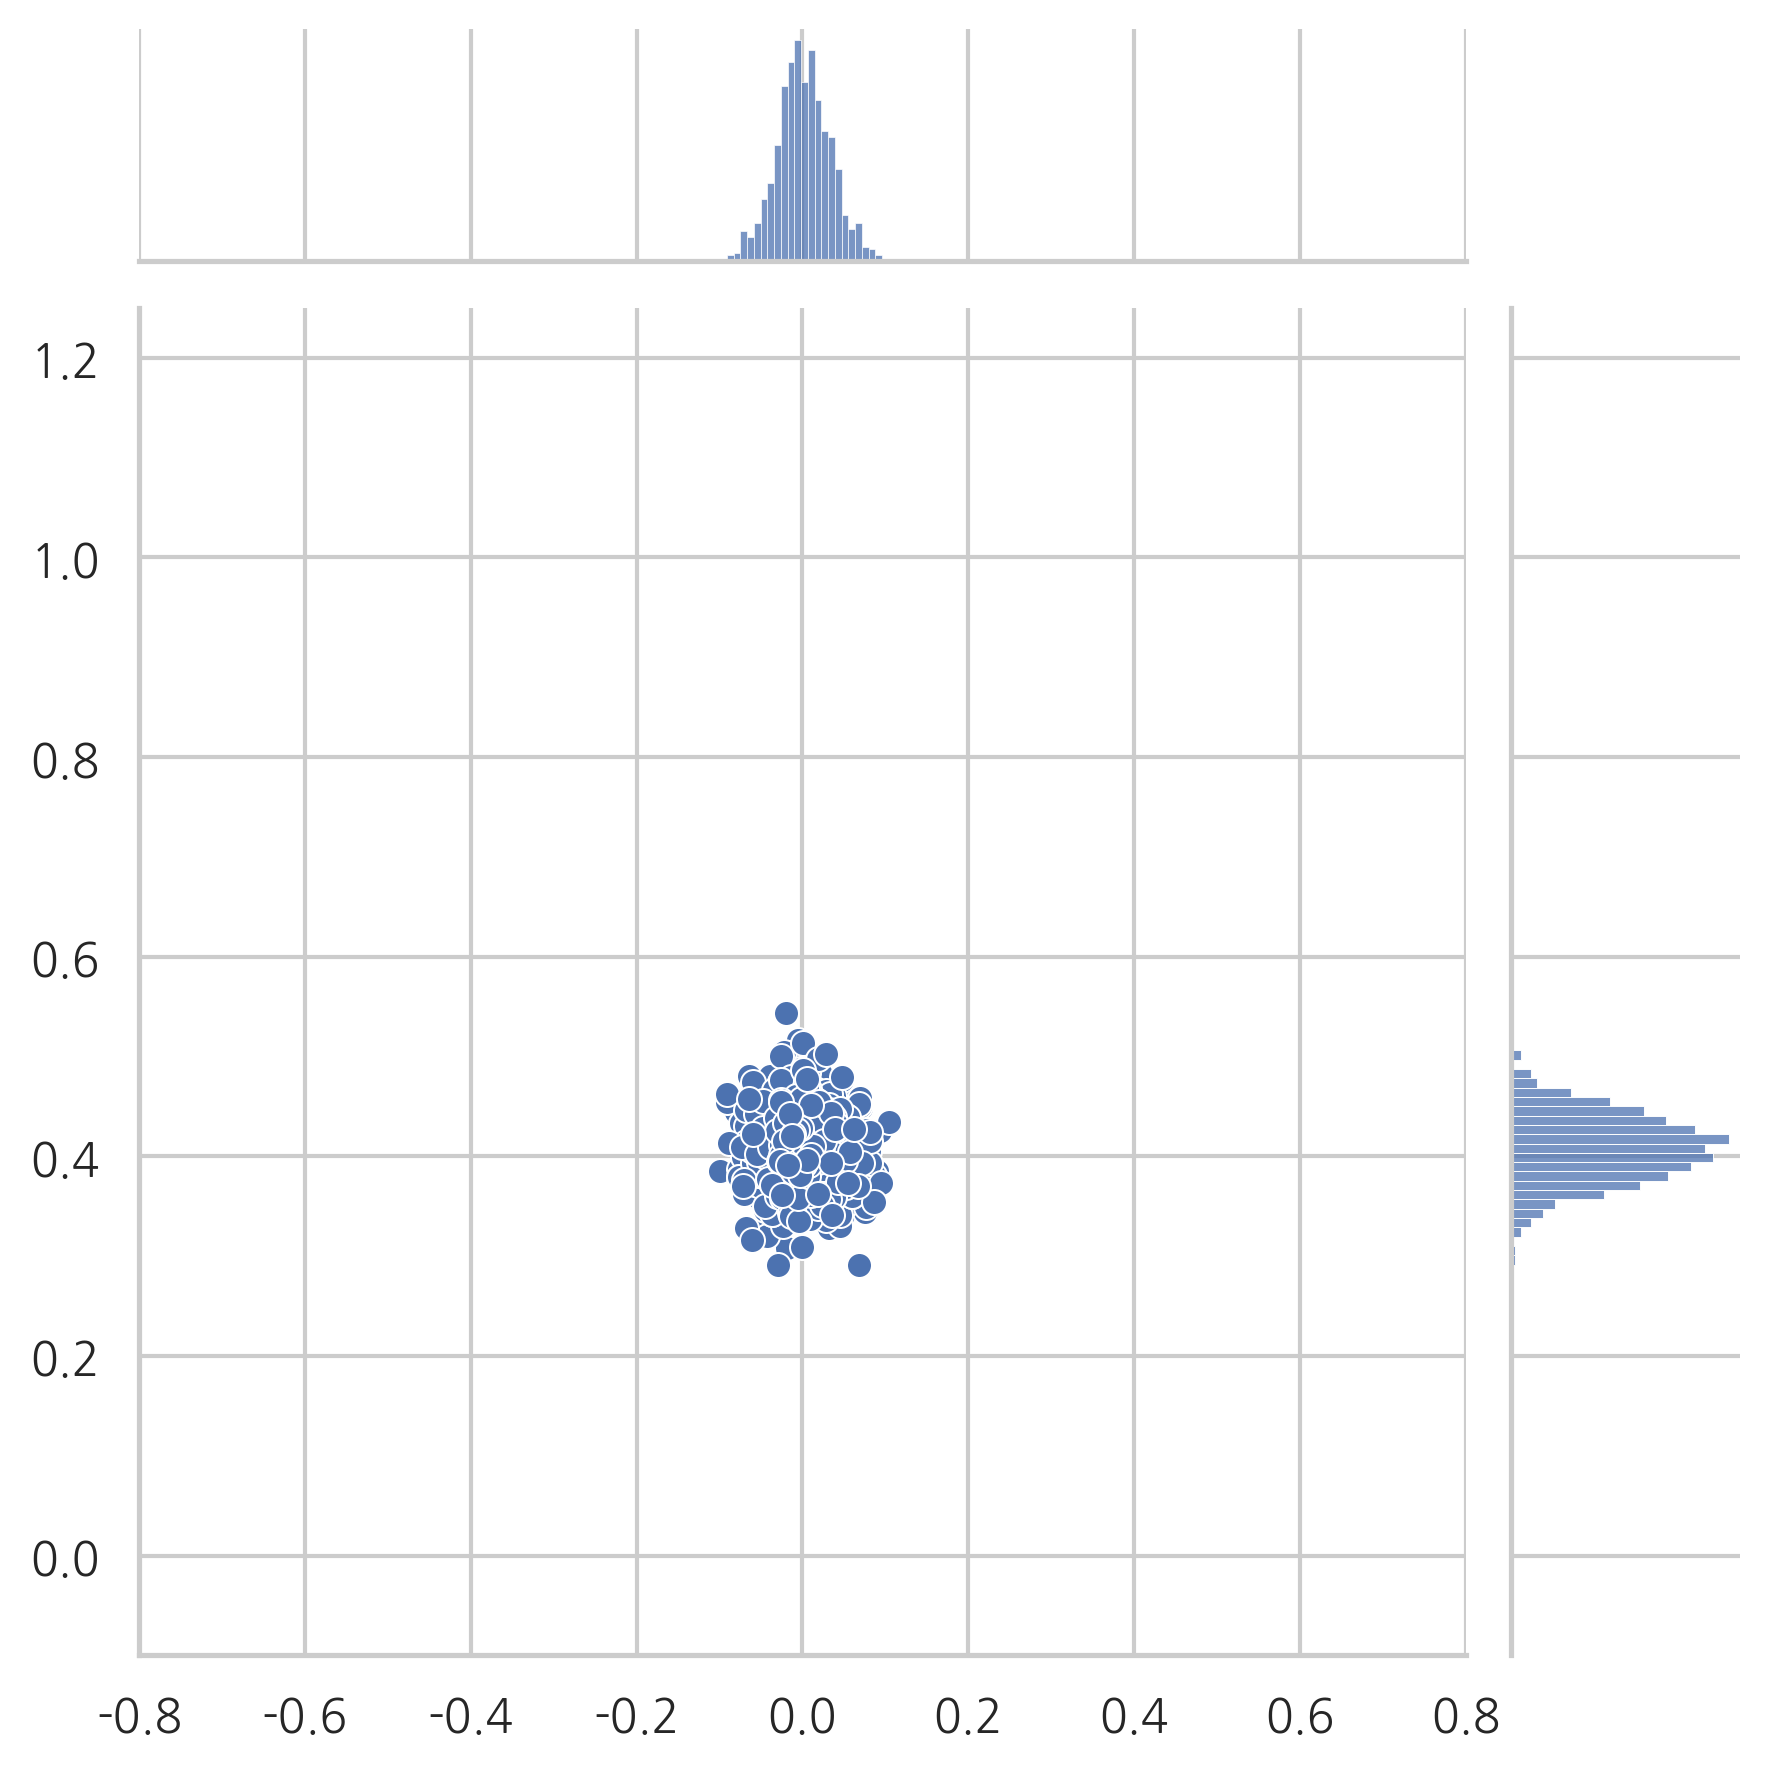

In [226]:
alpha = np.array([100,100,100])
X2 = sp.stats.dirichlet(alpha).rvs(1000)
plot_triangle(X2, kind='scatter')

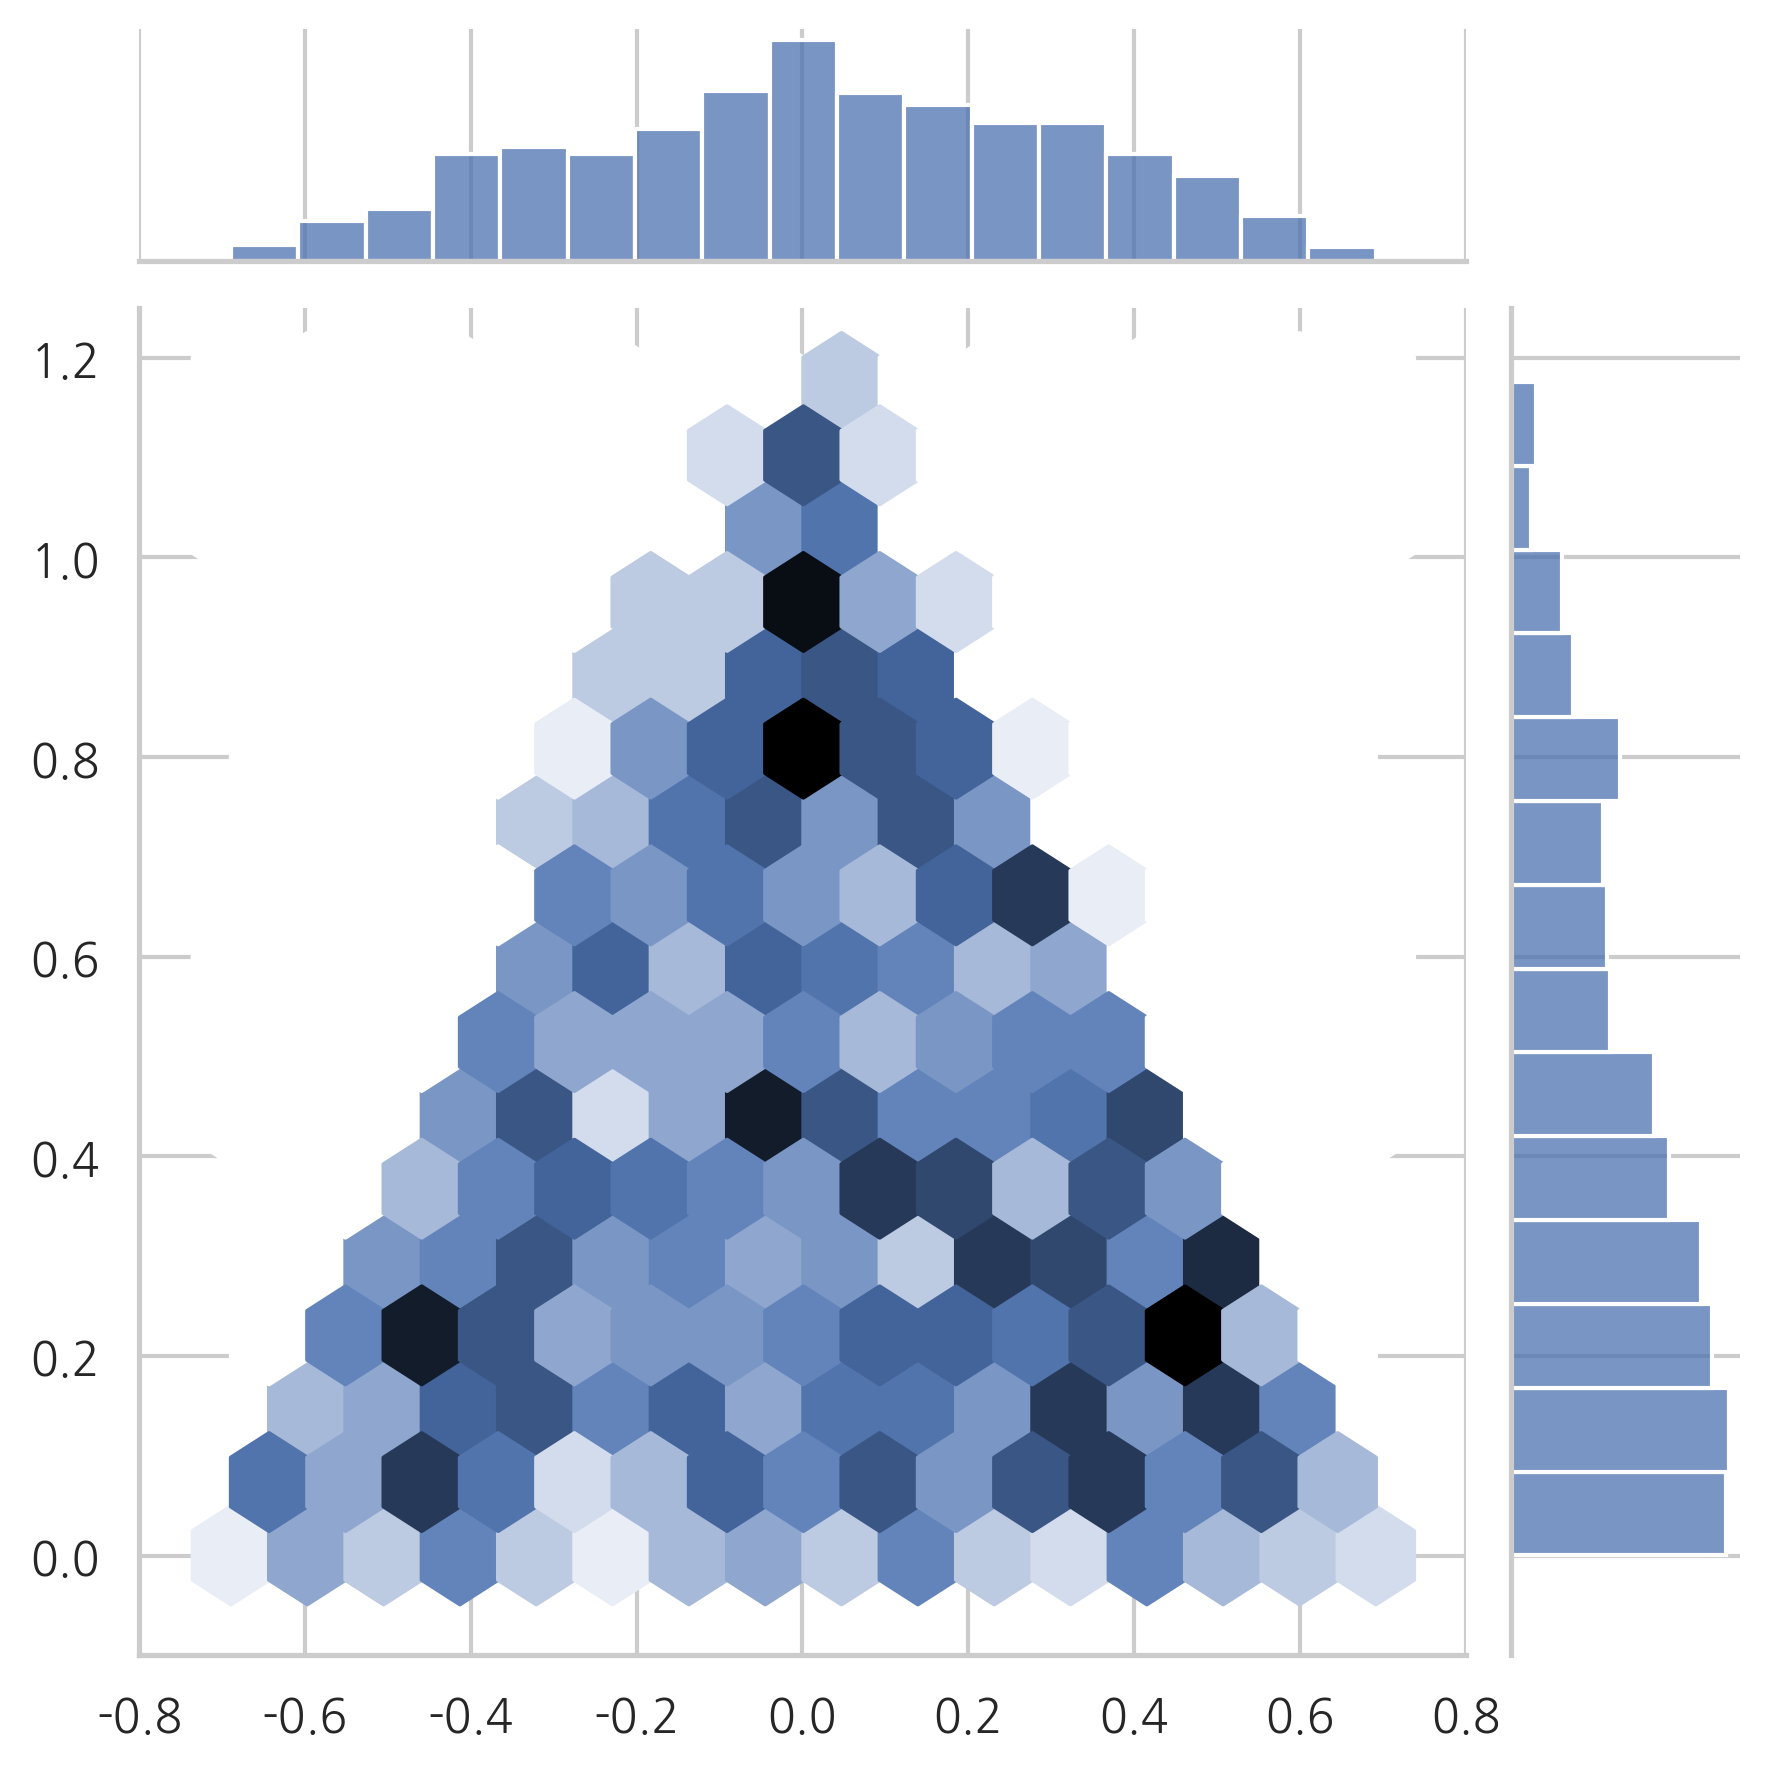

In [133]:
plot_triangle(X2,kind='hex')

# 디리클레분포 모수벡터 $\alpha$를 조정해서 분포 모양을 고르게 만들 수 있다. 

# 디리클레분포 모수벡터 $\alpha$가 (1,1,1)이 아닌 경우 : 
- 데이터 분포 모양을 조정해서 한 곳에 분포 집중되게 만들 수 있다. 

In [155]:
def project(x) : 
    n1 = np.array([1,0,0])
    n2 = np.array([0,1,0])
    n3 = np.array([0,0,1])
    n12 = (n1+n2)/2
    m1 = np.array([1,-1,0])
    m2 = n3-n12
    m1 = m1/np.linalg.norm(m1)
    m2 = m2/np.linalg.norm(m2)
    return np.dstack([(x-n12).dot(m1),(x-n12).dot(m2)])[0]

def project_reverse(x) : 
    n1 = np.array([1,0,0])
    n2 = np.array([0,1,0])
    n3 = np.array([0,0,1])
    n12 = (n1+n2)/2
    m1 = np.array([1,-1,0])
    m2 = n3-n12
    m1 = m1/np.linalg.norm(m1)
    m2 = m2/np.linalg.norm(m2)
    return x[:,0][:,np.newaxis]*m1+x[:,1][:,np.newaxis]*m2+n12

eps = np.finfo(float).eps*10
X = project([[1-eps,0,0],[0,1-eps,0],[0,0,1-eps]])

import matplotlib.tri as mtri
triang = mtri.Triangulation(X[:,0],X[:,1],[[0,1,2]])
refiner = mtri.UniformTriRefiner(triang)
triang2 = refiner.refine_triangulation(subdiv=6)
XYZ = project_reverse(np.dstack([triang2.x, triang2.y, 1-triang2.x-triang2.y])[0])
print(XYZ)

[[1.00000000e+00 7.77156117e-16 7.47856976e-16]
 [7.77156117e-16 1.00000000e+00 7.47856976e-16]
 [6.10622664e-16 6.10622664e-16 1.00000000e+00]
 ...
 [3.59375000e-01 3.28125000e-01 3.12500000e-01]
 [3.28125000e-01 3.12500000e-01 3.59375000e-01]
 [3.28125000e-01 3.43750000e-01 3.28125000e-01]]


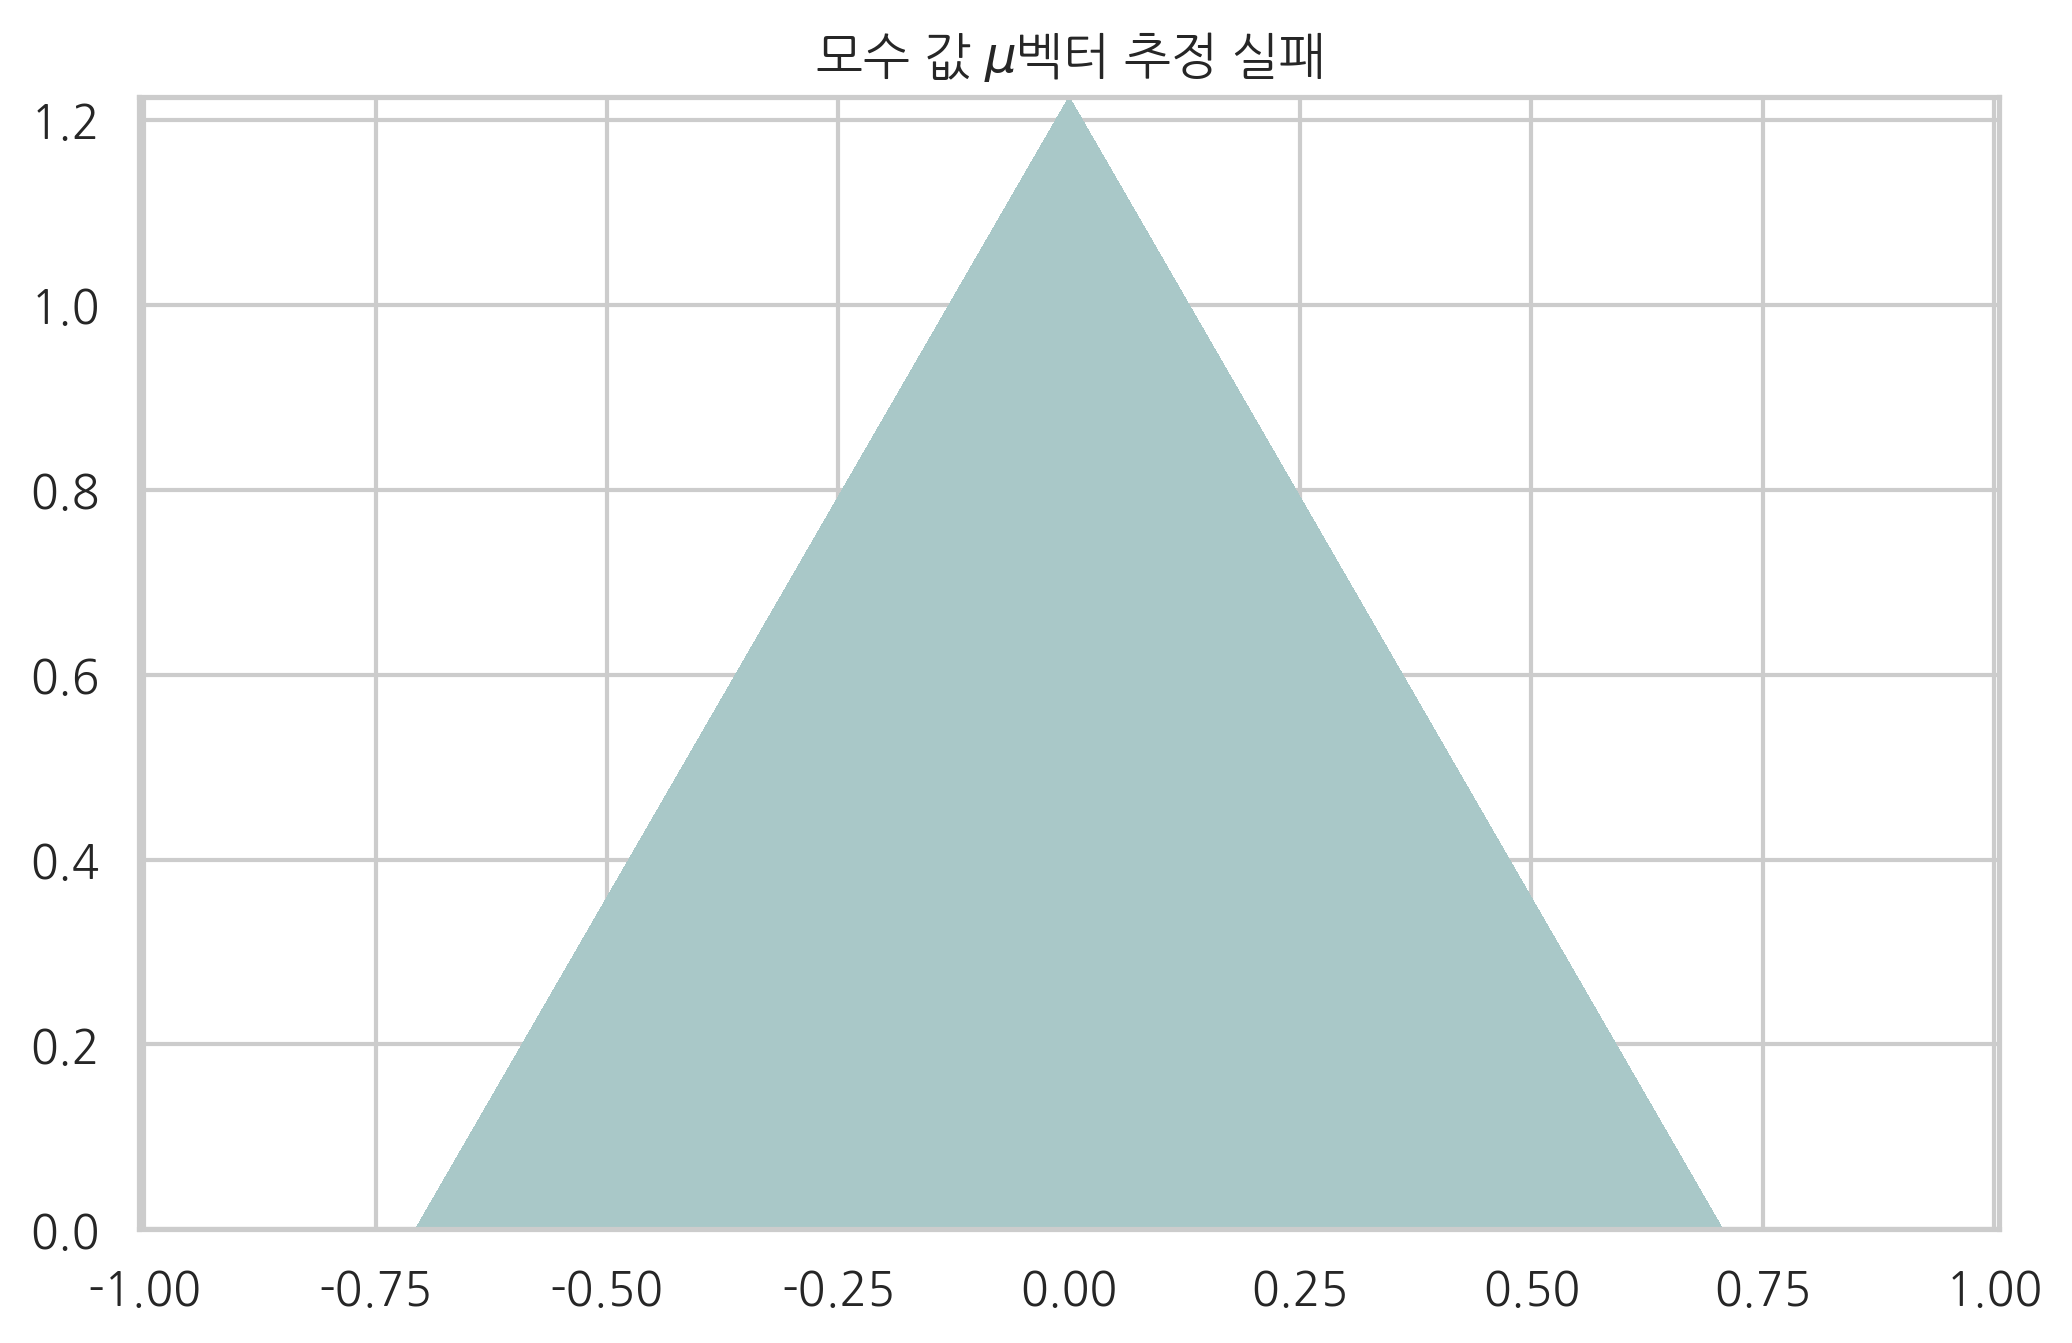

In [220]:
alpha = np.array([1,1,1])
pdf = sp.stats.dirichlet(alpha).pdf(XYZ.T) #골고루 잘게 퍼진 디리클레분포의 확률밀도함수 
plt.tricontourf(triang2,pdf, cmap=plt.cm.bone)
plt.axis('equal')
plt.title('모수 값 $\mu$벡터 추정 실패')
plt.show()

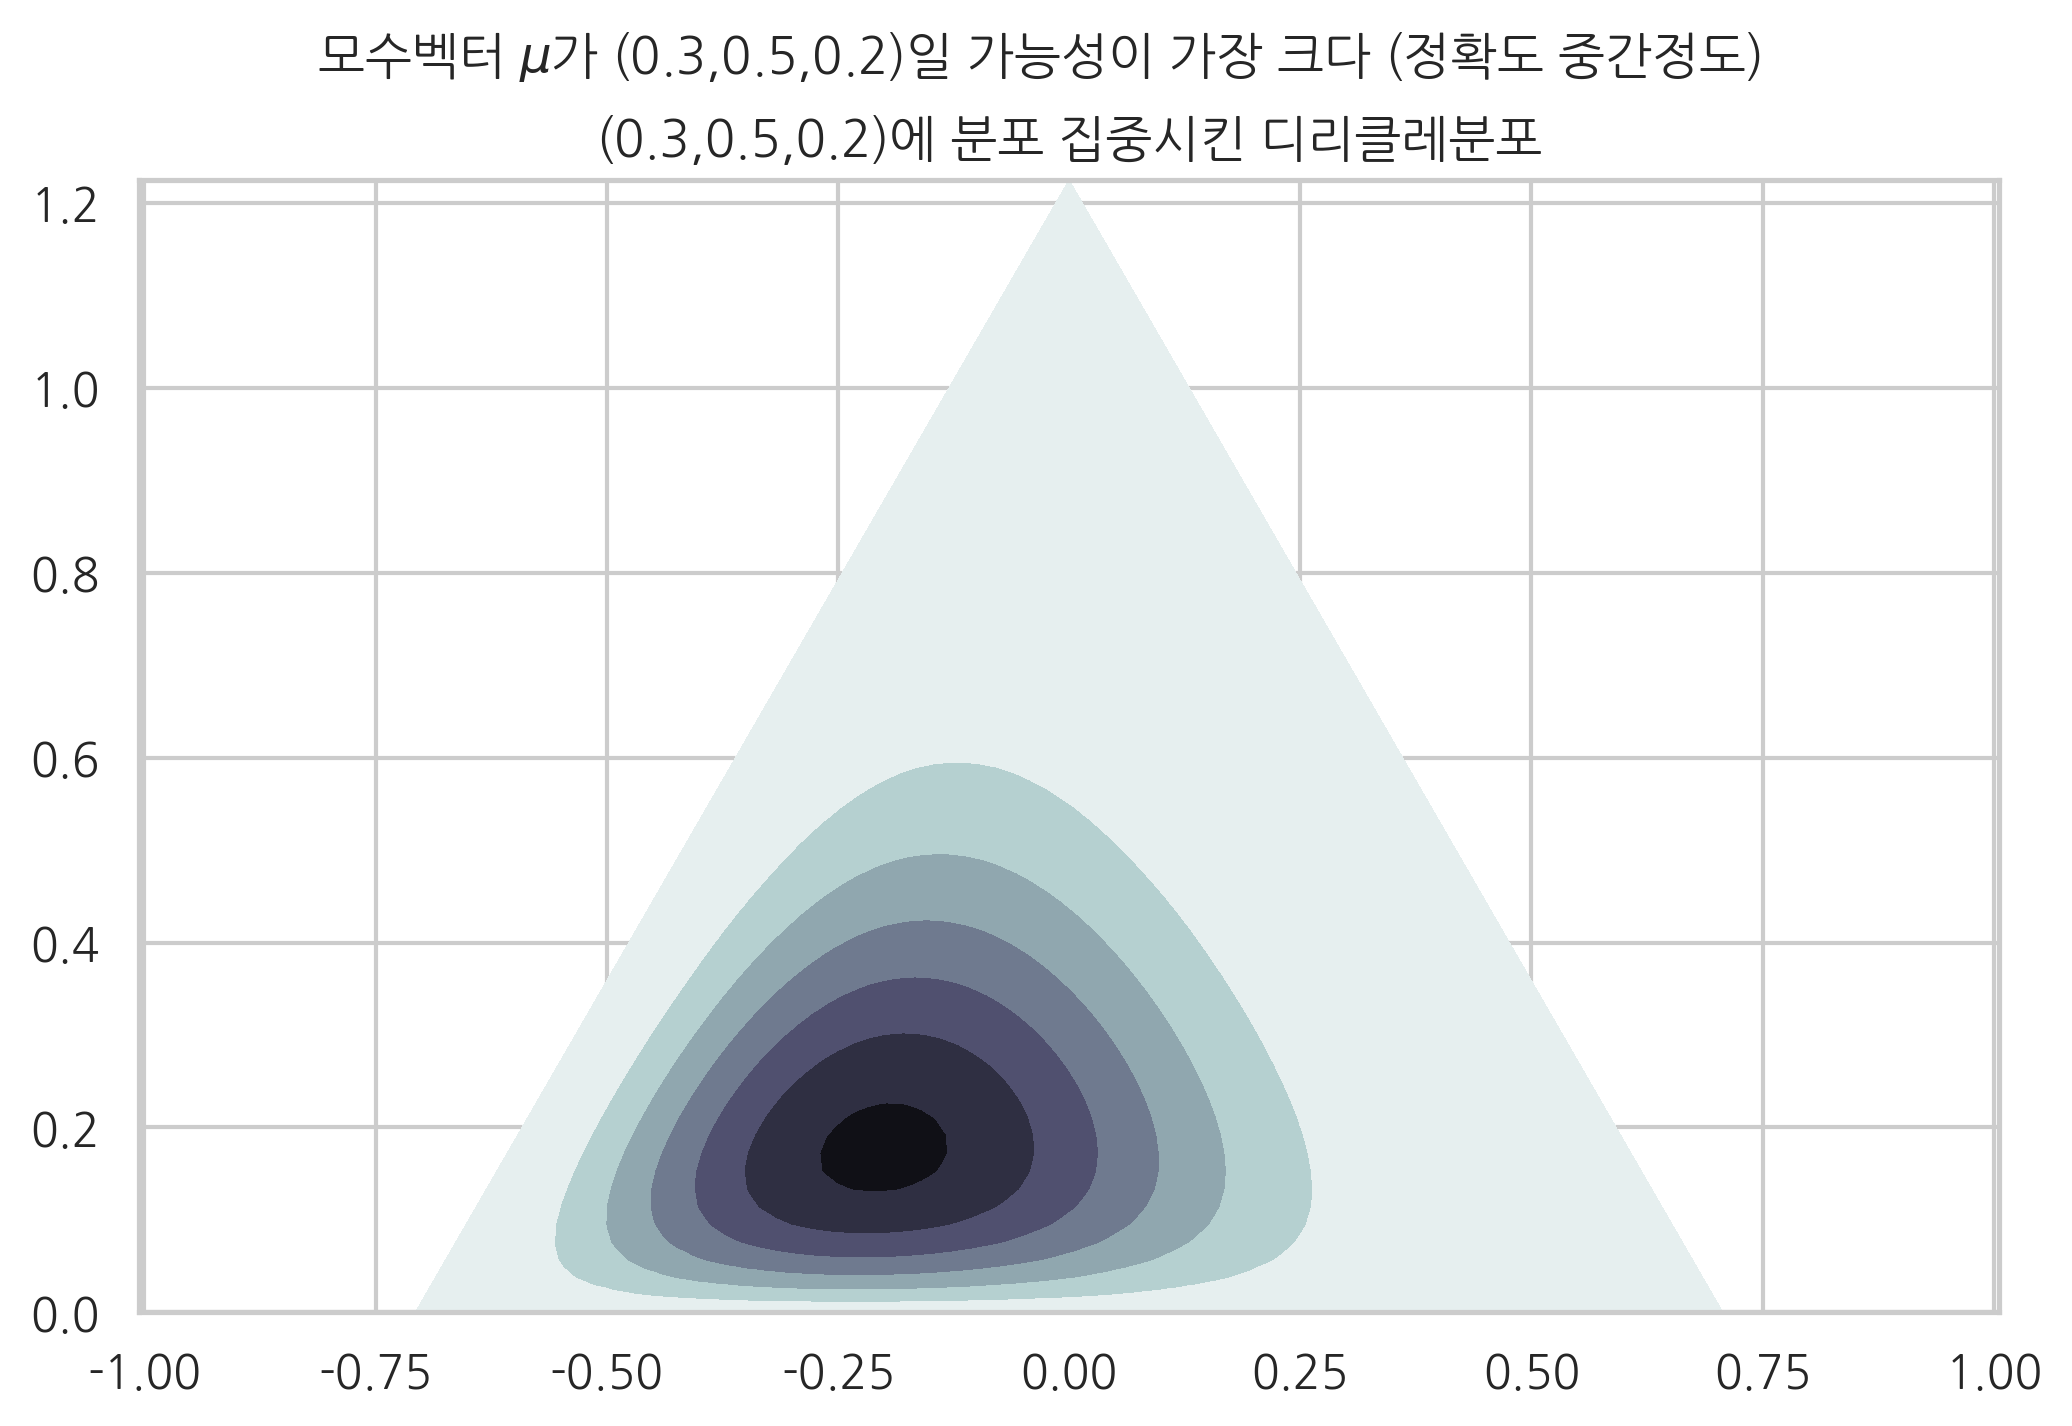

In [180]:
alpha = np.array([3,5,2])
pdf = sp.stats.dirichlet(alpha).pdf(XYZ.T) #(0.3,0.5,0.2) 지점에 분포 집중시킨 디리클레분포
plt.tricontourf(triang2, pdf, cmap=plt.cm.bone_r)
plt.axis('equal')
plt.title('(0.3,0.5,0.2)에 분포 집중시킨 디리클레분포')
plt.suptitle('모수벡터 $\mu$가 (0.3,0.5,0.2)일 가능성이 가장 크다 (정확도 중간정도)')
plt.show()

# 특정지점에 분포를 더 집중시켜서 베이지안 추정 정확도를 끌어올려보자. 
# 모수벡터 $\alpha$ 절댓값 키우면 분산 작아져서 확률분포가 한 점에 몰리게 된다. 
- 결과 : 베이지안 추정 정확도가 높아진다.

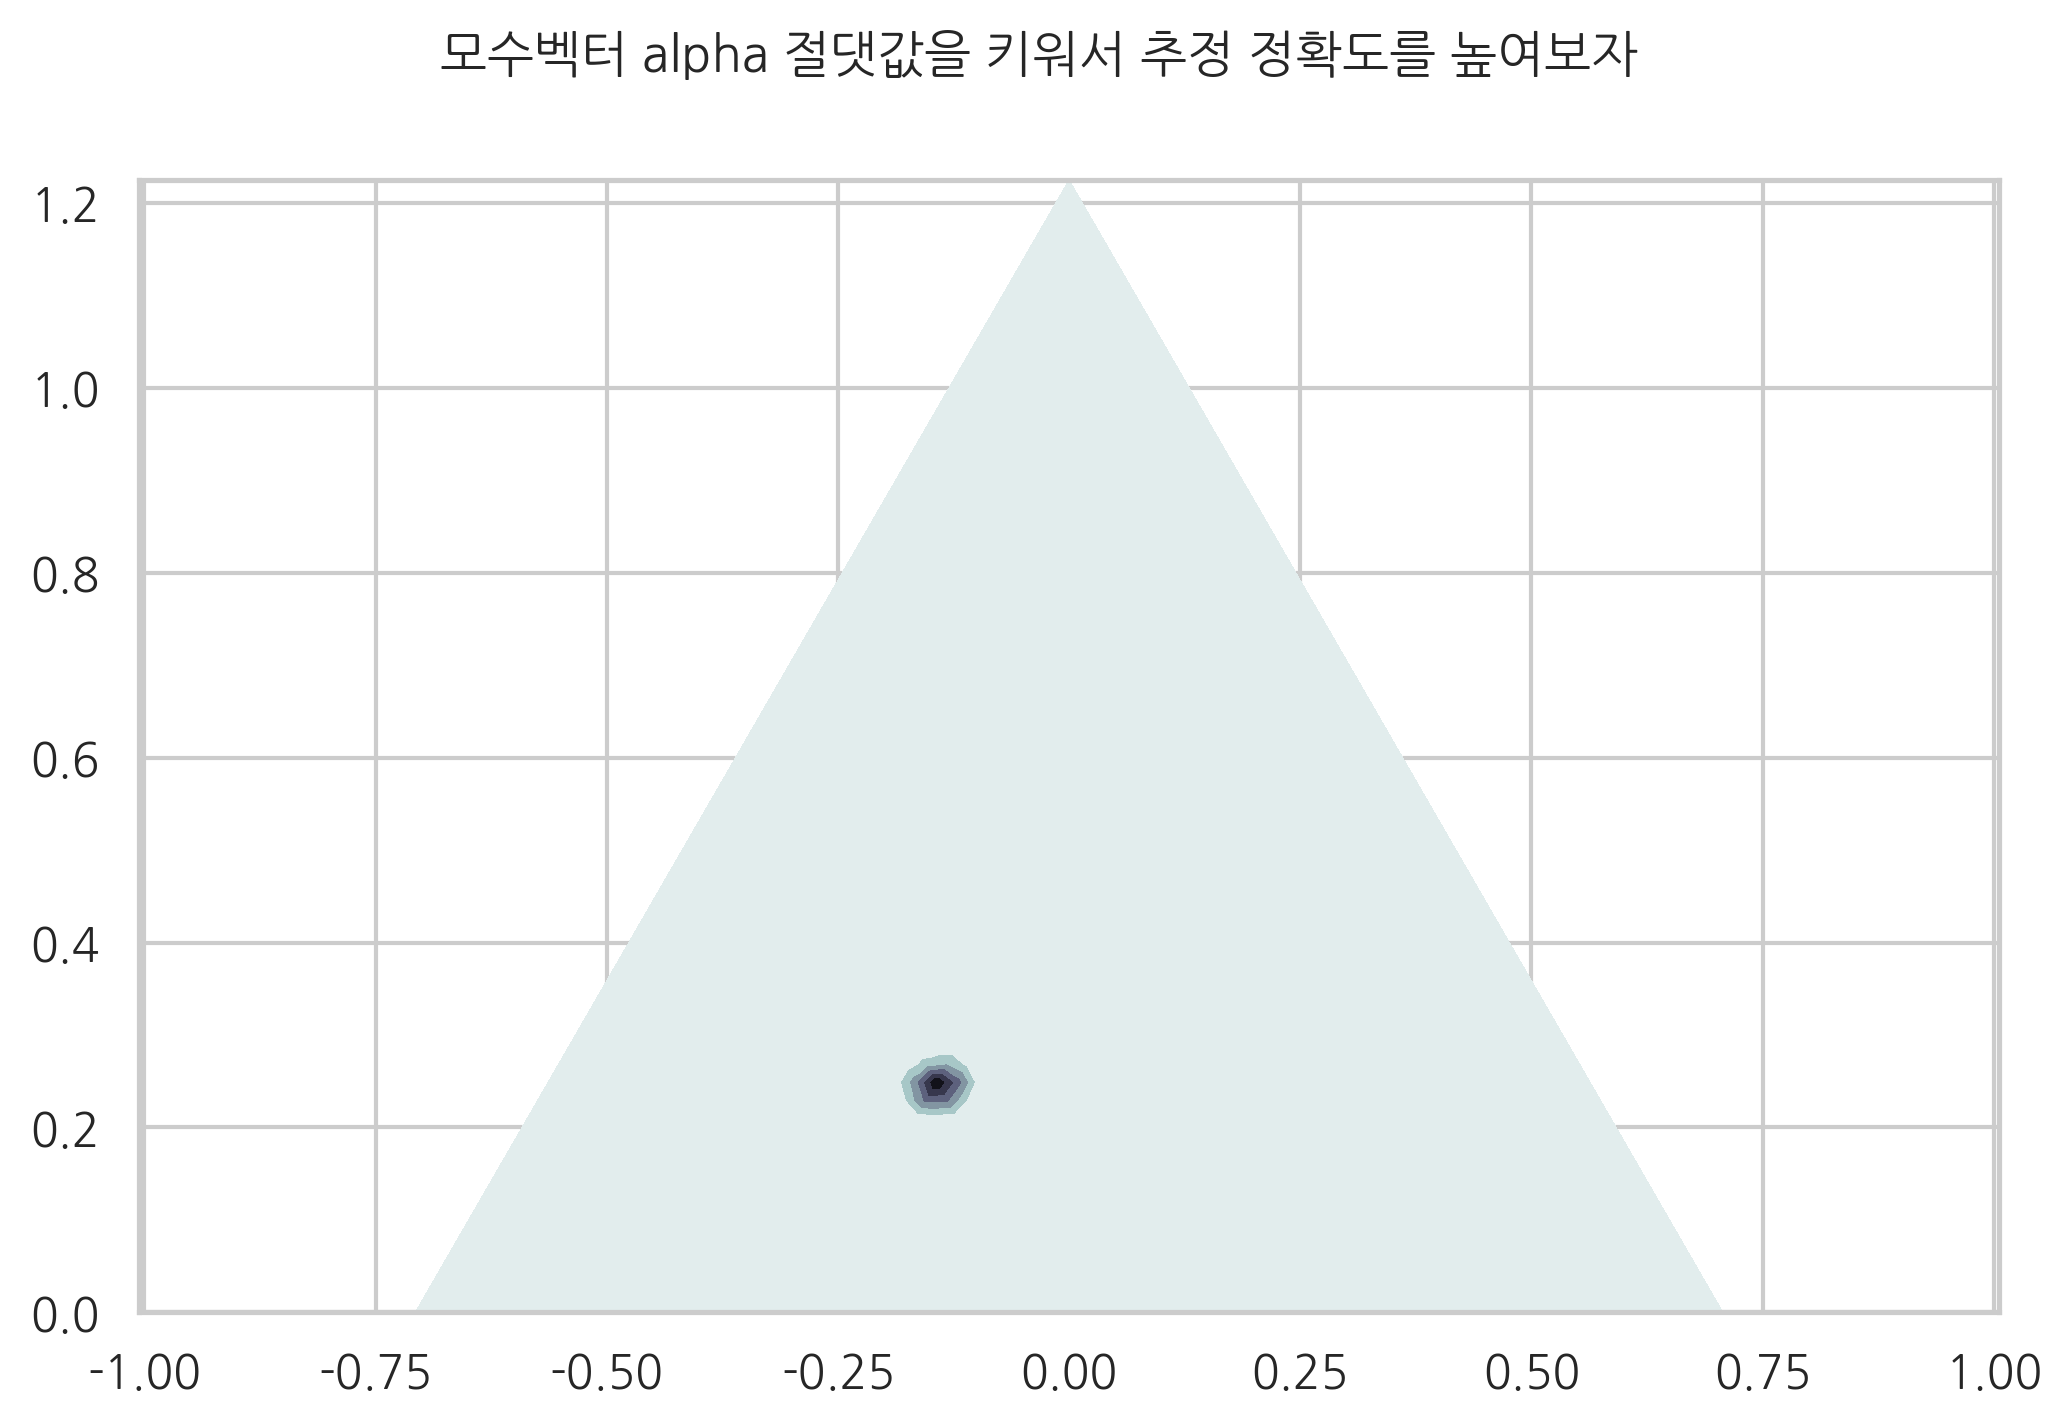

In [195]:
alpha = np.array([300,500,200])
pdf = sp.stats.dirichlet(alpha).pdf(XYZ.T)
plt.tricontourf(triang2, pdf, cmap=plt.cm.bone_r)
plt.axis('equal')
plt.suptitle('모수벡터 alpha 절댓값을 키워서 추정 정확도를 높여보자')
plt.show()

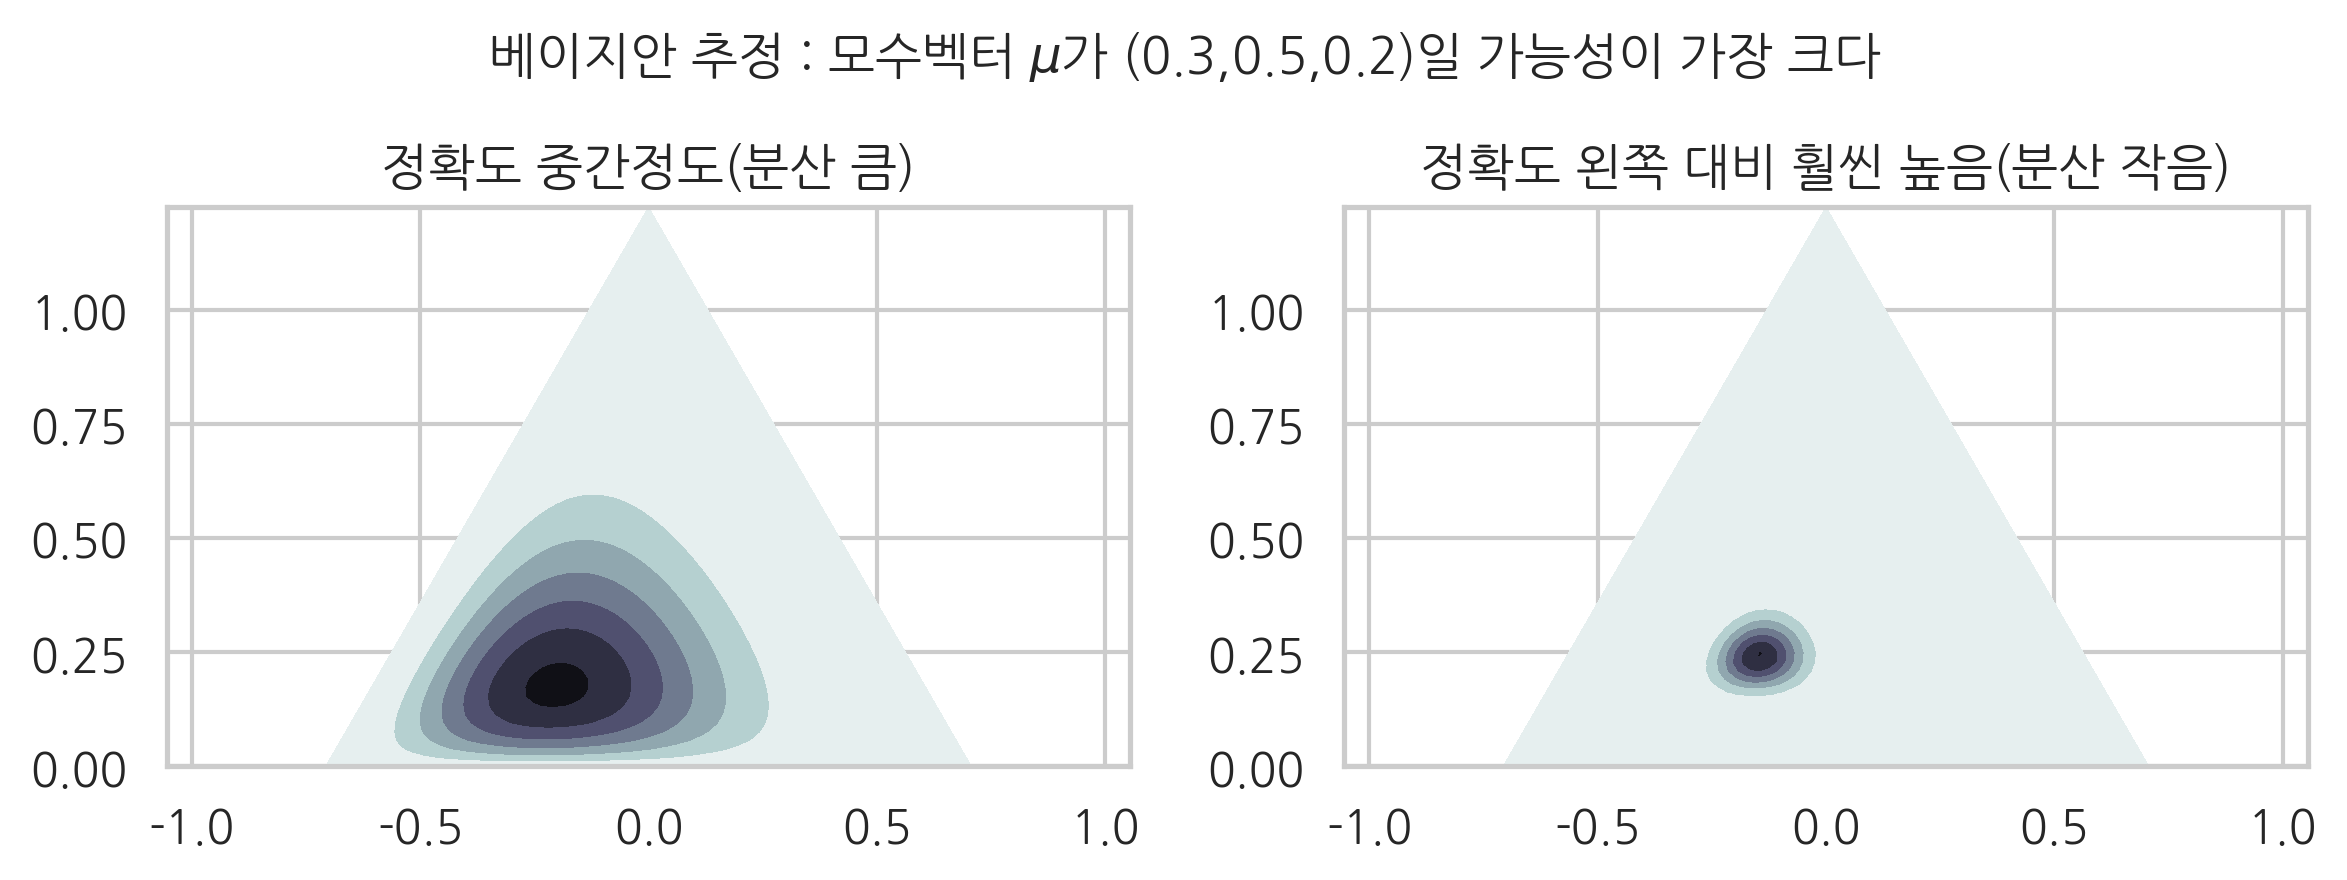

In [210]:
plt.subplot(221)
alpha = np.array([3,5,2])
pdf = sp.stats.dirichlet(alpha).pdf(XYZ.T) #(0.3,0.5,0.2) 지점에 분포 집중시킨 디리클레분포
plt.tricontourf(triang2, pdf, cmap=plt.cm.bone_r)
plt.axis('equal')
plt.title('정확도 중간정도(분산 큼)')
plt.suptitle('베이지안 추정 : 모수벡터 $\mu$가 (0.3,0.5,0.2)일 가능성이 가장 크다')

plt.subplot(222)
alpha = np.array([30,50,20])
pdf = sp.stats.dirichlet(alpha).pdf(XYZ.T)
plt.tricontourf(triang2, pdf, cmap=plt.cm.bone_r)
plt.axis('equal')
plt.title('정확도 왼쪽 대비 훨씬 높음(분산 작음)')

plt.tight_layout()
plt.show()


고생했다. 아직 구멍이 많으니 앞으로 돌아가서 계속 반복.복습할 것. 6/20/2021